In [11]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt

EDGE_COLOR = '#FF0000'
NODE_COLOR = '#0000FF'

In [6]:
def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    x = []
    y_tmp = []
    
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()
    
def rand_prob_node():
    nodes_probs = []
    for node in G.nodes():
        node_degr = G.degree(node)
        node_proba = node_degr / (2 * len(G.edges()))
        nodes_probs.append(node_proba)
    random_proba_node = np.random.choice(G.nodes(),p=nodes_probs)
    return random_proba_node

def add_edge():
        if len(G.edges()) == 0:
            random_proba_node = 0
        else:
            random_proba_node = rand_prob_node()
        new_edge = (random_proba_node, new_node)
        if new_edge in G.edges():
            add_edge()
        else:
            G.add_edge(new_node, random_proba_node)

In [9]:
init_nodes = 3
final_nodes = 1000
m_parameter = 3

G = nx.complete_graph(init_nodes)

count = 0
new_node = init_nodes

for f in range(final_nodes - init_nodes):
    G.add_node(init_nodes + count)
    count += 1
    for e in range(0, m_parameter):
        add_edge()
    new_node += 1

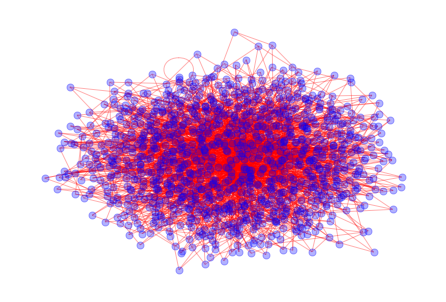

In [13]:
nx.draw(G, alpha = .3, edge_color = EDGE_COLOR, node_color = NODE_COLOR, node_size=50)

In [14]:
connected_count = 0;
for i in range(100):
    newGraph = G.copy()
    remove_count=0
    for u, v in newGraph.edges():
        if(rd.randint(1, 20) == 1):
            newGraph.remove_edge(u, v)
            remove_count+=1
    print(remove_count)
    if(nx.is_connected(newGraph)): connected_count+=1
print(100-connected_count)

157
144
145
138
131
142
154
150
152
149
157
156
138
134
161
163
159
164
138
134
123
160
164
144
145
144
138
178
160
160
153
147
158
130
160
127
164
161
152
125
163
143
138
138
150
153
150
141
163
135
149
155
155
151
162
166
143
154
160
139
151
156
145
145
149
155
128
127
180
150
175
131
143
148
115
160
150
124
124
154
149
148
134
132
160
137
152
139
147
146
151
138
151
135
170
147
140
156
174
158
9
